In [2]:
### description for bn implementation###
# method: after the 2 convolution layer, add batch normalization layer (using tensorflow bn layer)
# ex: conv2_bn = tf.layers.batch_normalization(conv_layer2)
# result explanation: comparing the final accuracy coverage values, the one with bn version is higher
#                     the plot is shown in the end of this file
# notice: this file does not contain cross entropy considering the cost of time of calculating validation accuracy
#         is large, which my notebook can not afford it( i don't have gpu qq)
#         the cross entropy is only implemented in final.ipnb



In [3]:
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#generate weight matrix
def genWeight(shape): 
    initial=tf.truncated_normal(shape,stddev=0.1) # 標準差=0.1
    return tf.Variable(initial)

In [8]:
#generate bias
def genBias(shape): 
    initial=tf.constant(0.1,shape=shape) 
    return tf.Variable(initial)

In [9]:
#define convolution layer
# zero padding at rightmost
# stride = (1,x movement,y movement,1)
# x = input image
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [10]:
#define max pooling layer
# 2x2 pooling
def max_pool_2x2(x): 
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')

In [14]:
def main(bn):
    result = []
    epoch = 3
    print "start training..."
#define placeholder
    _x = tf.placeholder(tf.float32,[None,784])
    _y = tf.placeholder(tf.float32,[None,10])
#dropout probability
    keep_prob = tf.placeholder(tf.float32)
#reshape _x, define channel = 1
    _image=tf.reshape(_x,[-1,28,28,1])
    
#constructing CNN
    ###---------layer 1---------###
    # input -> image with channel 1
    # output feature map: 32
    # after pooling we get 14x14x32 output
    W_conv1=genWeight([5,5,1,32])
    b_conv1=genBias([32])
    #use relu as activation function
    conv_layer1 = tf.nn.relu(conv2d(_image,W_conv1)+b_conv1)
    if bn==1:
        conv1_bn = tf.layers.batch_normalization(conv_layer1)
        pool_layer1 = max_pool_2x2(conv1_bn)
    else:
        pool_layer1 = max_pool_2x2(conv_layer1)
    
    ###--------layer 2---------###
    # input -> 32 feature maps
    # output feature map: 64
    # output-> after pooling we get 7x7x64 output
    W_conv2 = genWeight([5,5,32,64])
    b_conv2 = genBias([64])
    conv_layer2 = tf.nn.relu(conv2d(pool_layer1,W_conv2)+b_conv2)
    if bn==1:
        conv2_bn = tf.layers.batch_normalization(conv_layer2)
        pool_layer2 = max_pool_2x2(conv2_bn)
    else:
        pool_layer2 = max_pool_2x2(conv_layer2)


    
    ###------fully connected layer 1------###
    # size: 1024x1
    _flattern = tf.reshape(pool_layer2,[-1,7*7*64]) 
    W_fc1=genWeight([7*7*64,256]) 
    b_fc1=genBias([256])
    h_fc1=tf.nn.relu(tf.matmul(_flattern,W_fc1)+b_fc1)    
    #-----dropout----:
    h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)
    
    ###----fully connected layer 2----###
    # size 10 x 1
    # use softmax to classify
    W_fc2=genWeight([256,10]) 
    b_fc2=genBias([10])    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
    
    
    #---define cost function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=_y, logits=y_conv))
    
    #---setlearning rate
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(_y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    #define session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(epoch):
            print "       ##### epoch ",j+1," #####"
            for i in range(1100):
                batch = mnist.train.next_batch(50)
                train_accuracy = accuracy.eval(feed_dict={_x: batch[0], _y: batch[1], keep_prob: 1.0})
                if i % 100 == 0:
                    print('step %d, training accuracy %g' % (i, train_accuracy))
                train_step.run(feed_dict={_x: batch[0], _y: batch[1], keep_prob: 0.5})
            
            temp = accuracy.eval(feed_dict={_x: mnist.test.images, _y: mnist.test.labels, keep_prob: 1.0})
            result.append(temp)
            print('test accuracy %g' % temp)
    return result


In [12]:
#read data using tensorflow
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [15]:
#if the program is running
if __name__ == '__main__':
    print "#-----with batch normalization"
    result1 = main(bn=1)
    print "#-----without batch normalization--------"
    result2 = main(bn=0)


    

#-----with batch normalization
start training...

##### epoch  1  #####
step 0, training accuracy 0.06
step 100, training accuracy 0.76
step 200, training accuracy 0.72
step 300, training accuracy 0.84
step 400, training accuracy 0.74
step 500, training accuracy 0.88
step 600, training accuracy 0.86
step 700, training accuracy 0.9
step 800, training accuracy 0.84
step 900, training accuracy 0.78
step 1000, training accuracy 0.82
test accuracy 0.8338

##### epoch  2  #####
step 0, training accuracy 0.82
step 100, training accuracy 0.82
step 200, training accuracy 0.82
step 300, training accuracy 0.86
step 400, training accuracy 0.82
step 500, training accuracy 0.9
step 600, training accuracy 0.9
step 700, training accuracy 0.84
step 800, training accuracy 0.88
step 900, training accuracy 0.88
step 1000, training accuracy 0.84
test accuracy 0.8567

##### epoch  3  #####
step 0, training accuracy 0.78
step 100, training accuracy 0.84
step 200, training accuracy 0.82
step 300, training acc

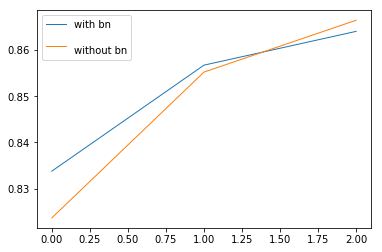

In [16]:
#plot the results
iter_log = np.arange(len(result1)).tolist()
plt.plot(iter_log, result1 , label="with bn", linewidth=1)
plt.plot(iter_log, result2, label="\nwithout bn", linewidth=1)
plt.legend()

